# Art - CMPINF0010 Final Project Personal Notebook

Importing the dataset from the WPRDC and setting values:

In [2]:
# importing everything needed
import pandas as pd
import numpy as np
import geopandas
import math
%matplotlib inline
import matplotlib.pyplot as plt

# setting values so it makes manipulating the data easier
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
pittsburgh_public_art_data = pd.read_csv("WPRDCPublicArtData.csv")

# preview of the data unfiltered yet(just the first 10 rows of the dataframe)
pittsburgh_public_art_data.head(10)

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981
5,752311791,153,Oakley Street Mosaic Steps,Laura Jean McLaughlin,Modern and Contemporary Art,NaN,NaN,South Side Slopes,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.423580,-79.968693
6,915929762,156,Windows of Light,Jane Haskell,Modern and Contemporary Art,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,275033545,157,Time Travelers,Edith Abeyta & Sandy Kessler Kaminski,Modern and Contemporary Art,NaN,NaN,Hazelwood,5.0,15.0,4.200356e+10,3.0,15.0,4.0,2-13,40.406833,-79.944514
8,687548560,159,Untitled (Ben Grubb),Ben Grubb,Modern and Contemporary Art,Highland Park,NaN,Highland Park,7.0,11.0,4.200398e+10,2.0,11.0,5.0,3-9,40.481455,-79.911319
9,1980433881,161,Caves,Randi Stewart,Modern and Contemporary Art,Frick Park,NaN,Squirrel Hill South,5.0,14.0,4.200398e+10,3.0,14.0,4.0,2-21,40.429959,-79.914858


Counting how many public art pieces are in each neighborhood:

In [3]:
pub_art_dict = {}

neighborhoodname = 0

# a for loop iterrating through the public art dataset's rows
for index, row in pittsburgh_public_art_data.iterrows():
    # setting neighborhoodname as the 'neighborhood' value in the current row
    neighborhoodname = row['neighborhood']
    
    # if the neighborhoodname is a key already in the dict 1 is added to its value
    if neighborhoodname in pub_art_dict:
        pub_art_dict[neighborhoodname] += 1
    # if the neighborhoodname isn't, its added to the dict with a value of 1
    else:
        pub_art_dict[neighborhoodname] = 1
        
# seeing the result of the code above
print(pub_art_dict)

{'Oakwood': 1, 'Elliott': 3, 'Central Business District': 27, 'Carrick': 2, 'Brookline': 2, 'South Side Slopes': 3, nan: 2, 'Hazelwood': 3, 'Highland Park': 10, 'Squirrel Hill South': 20, 'Perry North': 2, 'Beltzhoover': 3, 'Spring Hill-City View': 4, 'West End': 2, 'Greenfield': 3, 'Shadyside': 6, 'East Allegheny': 2, 'Squirrel Hill North': 2, 'Beechview': 7, 'Crawford-Roberts': 3, 'Lincoln-Lemington-Belmar': 2, 'Hays': 1, 'Allegheny Center': 18, 'North Oakland': 1, 'South Side Flats': 9, 'Central Oakland': 5, 'Point Breeze': 3, 'Allegheny West': 1, 'Strip District': 2, 'Mount Washington': 2, 'Brighton Heights': 5, 'Perry South': 1, 'North Shore': 8, 'Upper Hill': 2, 'Garfield': 2, 'Central Lawrenceville': 2, 'Upper Lawrenceville': 1, 'Stanton Heights': 1, 'Duquesne Heights': 3, 'Allentown': 2, 'East Liberty': 1, 'Bloomfield': 1, 'East Carnegie': 1, 'East Hills': 1, 'Lower Lawrenceville': 5, 'Overbrook': 1, 'Polish Hill': 1, 'Regent Square': 1, 'Sheraden': 1, 'Spring Garden': 2, 'Swis

Sorting the data into a more legible manner:

In [4]:
pub_art_series = pd.Series(pub_art_dict)
pub_art_series.sort_values()

Oakwood                       1
Knoxville                     1
Perry South                   1
Upper Lawrenceville           1
Stanton Heights               1
East Liberty                  1
Bloomfield                    1
East Carnegie                 1
North Oakland                 1
East Hills                    1
Polish Hill                   1
Regent Square                 1
Sheraden                      1
Swisshelm Park                1
Troy Hill                     1
Crafton Heights               1
Esplen                        1
Overbrook                     1
Hays                          1
Allegheny West                1
Manchester                    1
Carrick                       2
Brookline                     2
Spring Garden                 2
NaN                           2
Perry North                   2
Allentown                     2
Central Lawrenceville         2
Garfield                      2
Upper Hill                    2
Lincoln-Lemington-Belmar      2
West End

Better than before but still very busy looking. Trying a bar graph instead:

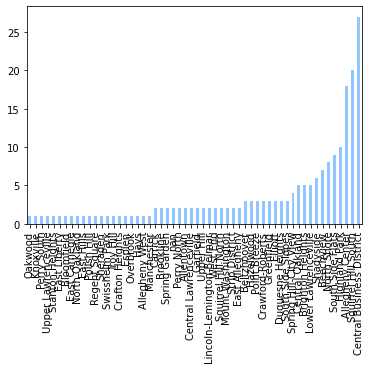

In [5]:
plt.style.use('seaborn-pastel')
pub_art_series.sort_values().plot.bar()

Can barely read each of the labels and the bar graph is a bit small. Cleaning the graph up:

Text(0.5, 0, 'Total Number of Public Art Pieces')

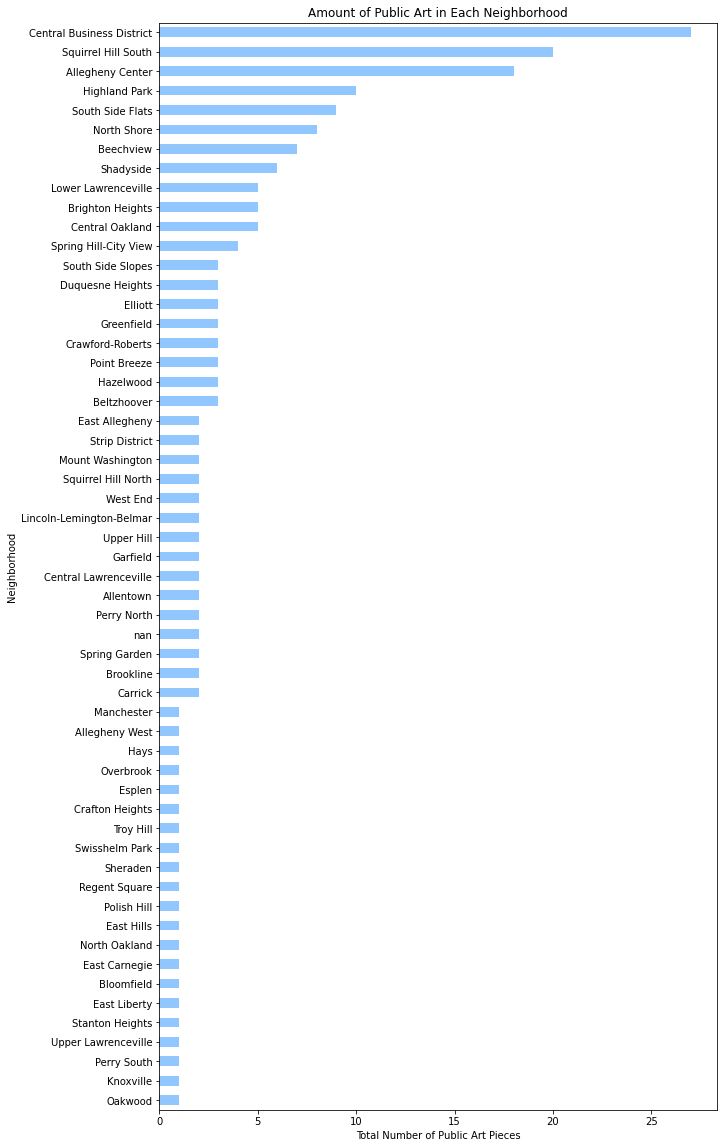

In [6]:
sorted_pub_art_series = pub_art_series.sort_values()

# rotating the bar graph and making it larger
pubart_chart = sorted_pub_art_series.plot.barh(figsize=(10, 20)) 

# adding axis labels and a title
plt.title('Amount of Public Art in Each Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Total Number of Public Art Pieces')

Easier on the eyes, but all of those neighborhoods don't need to be looked at. Only the top 10 really matter:

Text(0.5, 0, 'Total Number of Public Art Pieces')

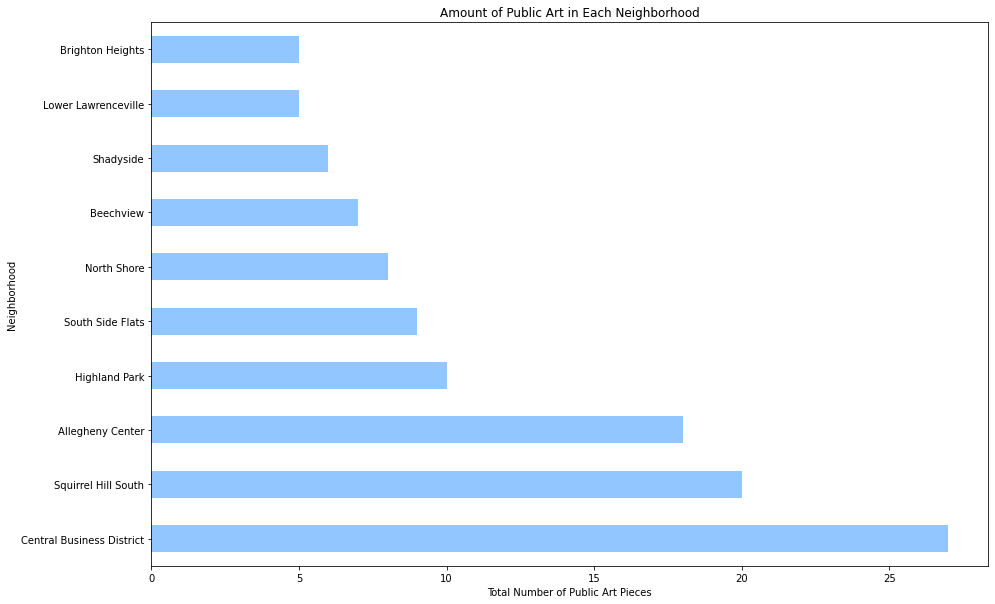

In [7]:
sorted_pub_art_series.sort_values(ascending = False)[:10].plot.barh(figsize=(15, 10))

plt.title('Amount of Public Art in Each Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Total Number of Public Art Pieces')

From the looks of the graph above, the top three with the most public art pieces are:
1. Central Business District
2. Squirrel Hill South
3. Allegheny Center

Making a map version of the data:

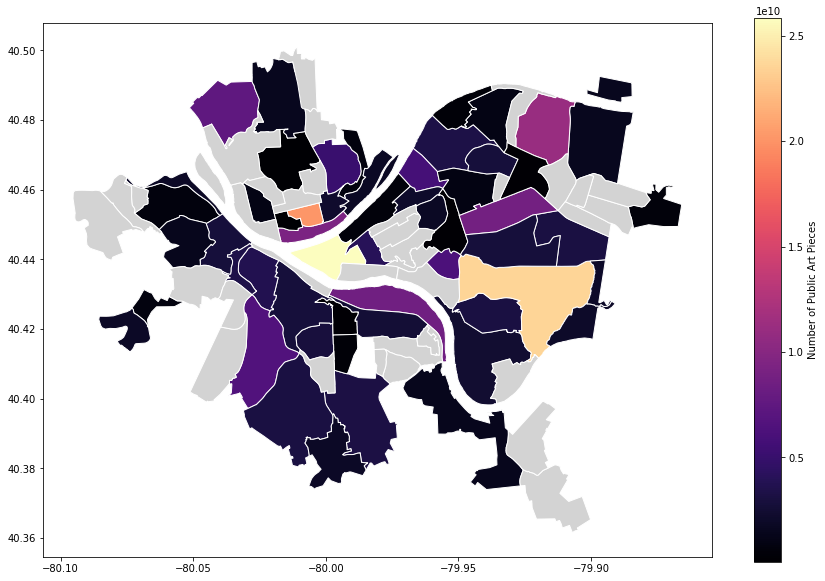

In [8]:
# setting values
num_art_perneigh = pittsburgh_public_art_data.groupby("neighborhood").sum(['id'])
artpubmap = neighborhoods.merge(num_art_perneigh, 
                                how='left', 
                                left_on='hood', 
                                right_on='neighborhood')

# plotting the data and setting how it'll look
artpubmap.plot(column='id',cmap='magma',              
               edgecolor="white",        
               legend=True,           
               legend_kwds={'label': "Number of Public Art Pieces"},
               figsize=(15, 10),       
               missing_kwds={"color": "lightgrey"})

Although just because a neighborhood has some art pieces, that solely doesn't decide how good it is. The type of each art piece is a crucial indicator of how good it is. Objectively, Modern and Contemporary Art is the best since its fresh for the eyes, second being Historic Art, third as Individual and Historic Monuments, and War Memorials as last since the atmosphere of a war memorial is not one most look for during trips/visits. Counting how many public art pieces each neighborhood has with weighted values:

In [9]:
pubartweighed = {}

borhoodweighed = 0

# creating a variable to hold a value of whatever type of art the piece is
kindaart = 0
for index, row in pittsburgh_public_art_data.iterrows():
    borhoodweighed = row['neighborhood']
    # setting kindaart as the 'art_type' value in the current row
    kindaart = row['art_type']
    if borhoodweighed in pubartweighed:
        # if the kinddart is Historic Art, it is worth 4 points
        if kindaart == "Historic Art":
            pubartweighed[borhoodweighed] += 4
        # if the kinddart is Individual and Historic Art, it is worth 3 points
        elif kindaart == "Individual and Historic Monuments":
            pubartweighed[borhoodweighed] += 3
        # if the kinddart is Modern and Contemporary Art, it is worth 5 points
        elif kindaart == "Modern and Contemporary Art":
            pubartweighed[borhoodweighed] += 5
        # if the kinddart is War Memorials, it is worth 2 points
        elif kindaart == "War Memorials":
            pubartweighed[borhoodweighed] += 2
        # if there is no 'art_type' the piece is worth 1 point instead of none since its still an art piece and more art is better than none
        else:
            pubartweighed[borhoodweighed] += 1
    else:
        if kindaart == "Historic Art":
            pubartweighed[borhoodweighed] = 4
        elif kindaart == "Individual and Historic Monuments":
            pubartweighed[borhoodweighed] = 3
        elif kindaart == "Modern and Contemporary Art":
            pubartweighed[borhoodweighed] = 5
        elif kindaart == "War Memorials":
            pubartweighed[borhoodweighed] = 2
        else:
            pubartweighed[borhoodweighed] = 1

print(pubartweighed)

{'Oakwood': 1, 'Elliott': 12, 'Central Business District': 90, 'Carrick': 6, 'Brookline': 5, 'South Side Slopes': 8, nan: 8, 'Hazelwood': 15, 'Highland Park': 41, 'Squirrel Hill South': 65, 'Perry North': 10, 'Beltzhoover': 9, 'Spring Hill-City View': 11, 'West End': 7, 'Greenfield': 10, 'Shadyside': 28, 'East Allegheny': 10, 'Squirrel Hill North': 2, 'Beechview': 12, 'Crawford-Roberts': 13, 'Lincoln-Lemington-Belmar': 10, 'Hays': 2, 'Allegheny Center': 62, 'North Oakland': 3, 'South Side Flats': 27, 'Central Oakland': 11, 'Point Breeze': 13, 'Allegheny West': 5, 'Strip District': 7, 'Mount Washington': 7, 'Brighton Heights': 13, 'Perry South': 5, 'North Shore': 34, 'Upper Hill': 7, 'Garfield': 6, 'Central Lawrenceville': 7, 'Upper Lawrenceville': 5, 'Stanton Heights': 5, 'Duquesne Heights': 7, 'Allentown': 10, 'East Liberty': 5, 'Bloomfield': 2, 'East Carnegie': 2, 'East Hills': 2, 'Lower Lawrenceville': 13, 'Overbrook': 2, 'Polish Hill': 2, 'Regent Square': 2, 'Sheraden': 2, 'Spring 

Now lets make it more readable with a bar graph:

Text(0.5, 0, 'Good Art')

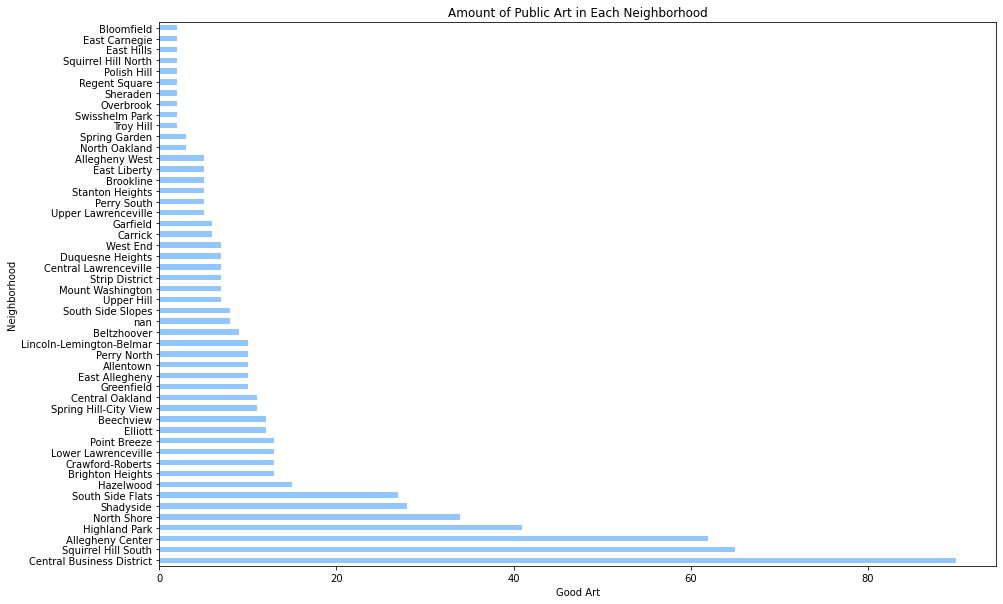

In [12]:
pubartweighed_series = pd.Series(pubartweighed)
sorted_pubartweighed_series = pubartweighed_series.sort_values()

sorted_pubartweighed_series.sort_values(ascending = False)[:50].plot.barh(figsize=(15, 10))

plt.title('Amount of Public Art in Each Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Good Art')

Similar to the unweighted data, the top three neighborhoods with the highest ranking remain unchanged. Those being:
1. Central Business District
2. Squirrel Hill South
3. Allegheny Center

Although the some of the neighborhoods in the overall top 10 changed. For example Crawford-Roberts didn't breach the top 10 in the unweighted but did with weighted values. On the other hand, Beechview dropped from the top 10 when weights were added.

Map version with the weighted values:

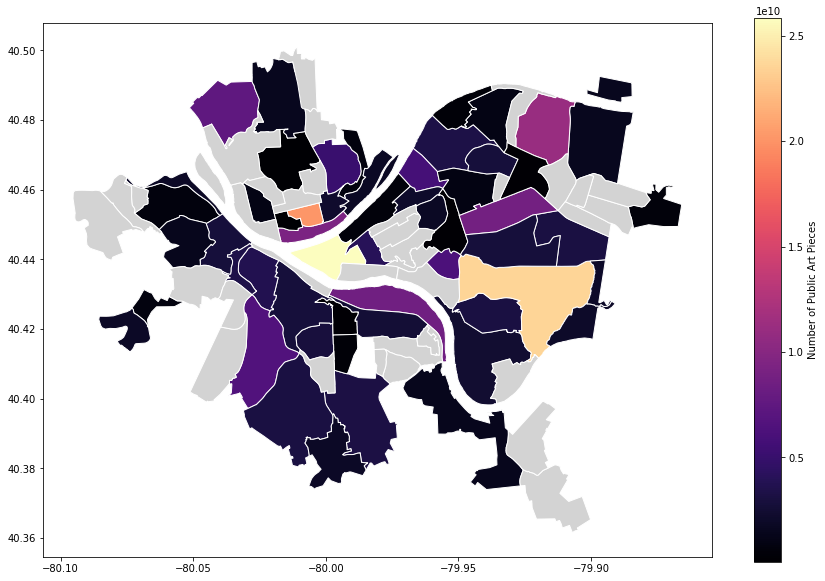

In [11]:
num_art_perneighwei = pittsburgh_public_art_data.groupby("neighborhood").sum(['id'])
artpubweimap = neighborhoods.merge(num_art_perneighwei, 
                                how='left', 
                                left_on='hood', 
                                right_on='neighborhood')

artpubweimap.plot(column='id',cmap='magma',              
               edgecolor="white",        
               legend=True,           
               legend_kwds={'label': "Number of Public Art Pieces"},
               figsize=(15, 10),       
               missing_kwds={"color": "lightgrey"})

The weighted map doesn't visually look incredibly different from the unweighted one, similar to the bar graphs from before.

### Conclusion

Central Business District is the overall winner as it has the most public art pieces, specifically 27. Even when point values for art types were considered, it still had the highest ranking, therefore making it the best Pittsburgh neighborhood in terms of public art.